# Multiple Linear Regression
In this notebook, we will expand on our discussion of linear regression to consider more independent variables in our models.

**Learning Objectives**

1. Add additional features to the linear regression problem to formulate a multiple linear regression problem.
2. Normalize features of different magnitudes to provide a more robust fit to data.
3. Apply linear regression models to different problems that estimate an output variable as a linear combination of input features.

**Import modules**
Begin by importing the modules to be used in this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd

In our previous notebook, we saw how we could fit a linear line to some data using an iterative approach. We took a look at an example of carbon dioxide concentrations as measured at the Mauna Loa observatory. Let's revisit this example here.

## Expanding on Simple Linear Regression

To begin, let's read in the data...

In [2]:
# read in the dataset as shown in the previous notebook
df = pd.read_csv('monthly_in_situ_co2_mlo.csv', skiprows=64)
df = df[df.iloc[:, 4] >0]

# subset to a given time range
df_subset = df[(df.iloc[:,3]>=2010) & (df.iloc[:,3]<=2020)]

# redefine x and y
x = np.array(df_subset.iloc[:,3])
y = np.array(df_subset.iloc[:,4])

# remove the first value of y
x = x-2010
y = y-y[0]

... and recreate the plot

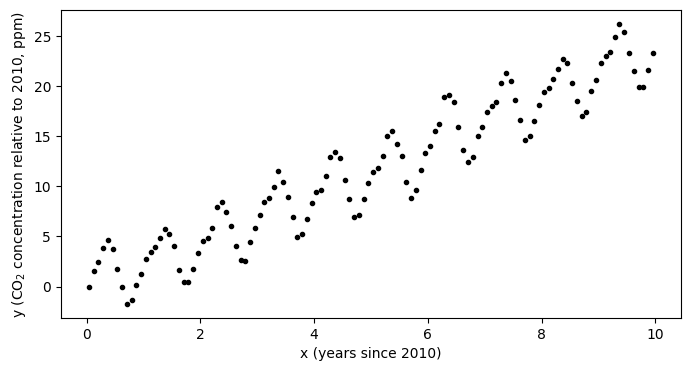

In [3]:
plt.figure(figsize=(8,4))
plt.plot(x,y,'k.')
plt.xlabel('x (years since 2010)')
plt.ylabel('y (CO$_2$ concentration relative to 2010, ppm)')
plt.show()

In our previous example, the question we were trying to answer was: *how much is the atmospheric concentration of CO$_2$ increasing each year*?

However, in looking at the data, we also see that the is a strong seasonal cycle. By eye, it looks like the magnitude of this cycling is something on the range of 2-4 ppm - that is, the concentration increases through the northwern hemisphere fall and winter and then decreases through spring and summer. We completely ignored this in our initial model but with a few small tweaks to the model, we can quantify *both* the trend and the amplitude of the seasonal cycle. Let's take a look.

We formulated out previous model in terms of a weight and a vias, and we combined the these constants together into a line with the equation

$$
\hat{y} = wx + b
$$

where, as a reminder, the "hat" symbol above the $y$ indicates it is a model estimate of a true value $y$. Here, we may consider a new model where the model estimate is not only a function of the trend, but also the seasonal cycle as follows:

$$
\hat{y} = w_1 x + w_2 \sin(2\pi x) + b
$$

where the $sin(2\pi x)$ is the seasonal cycle term and $w_2$ is its amplitude. In this example, we now have 2 weights $w_1$ and $w_2$ instead of just the single weight $w$. By solving for these coefficients, we can answer the question: *how much is the atmospheric concentration of CO$_2$ increasing each year and what is the annual variability of its range?*

For simplicity in notation, I will define $x_1 = x$ and $x_2 = \sin(2\pi x)$ so that the model can be written as

$$
\hat{y} = w_1 x_1 + w_2 x_2 + b
$$

It's important to note here that, in this example, $x_1$ and $x_2$ are both function of the independent variable $x$. However, all of the derivation below holds equally well for two independent variables $x_1$ and $x_2$.



Just as before, we can consider the application of our model to the set of $N$ input data values, which we can organize in a vector format as follows:

$$
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} = w_1 \begin{bmatrix} x_{1,1} \\ x_{1,2} \\ \vdots \\ x_{1,N} \end{bmatrix} + w_2 \begin{bmatrix} x_{2,1} \\ x_{2,2} \\ \vdots \\ x_{2,N} \end{bmatrix} + b\begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}\\
$$

With a little rearranging, we notice that we can actually write this the same we did before in matrix form:

$$
\hat{\textbf{y}} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} = w_1 \begin{bmatrix} x_{1,1} \\ x_{1,2} \\ \vdots \\ x_{1,N} \end{bmatrix} + w_2 \begin{bmatrix} x_{2,1} \\ x_{2,2} \\ \vdots \\ x_{2,N} \end{bmatrix} +  b\begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & x_{1,1} & x_{2,1}\\ 1 & x_{1,2} & x_{2,2}\\ \vdots & \vdots\\ 1 & x_{1,N} & x_{2,N}\end{bmatrix} \cdot \begin{bmatrix} b \\ w_1 \\ w_2 \end{bmatrix} = \textbf{X} \cdot \textbf{w}
$$

where here we have defined a matrix **X** which has a column of ones corresponding to the bias value $b$, another column with the input features corresponding to $w_1$, and another column correspodning to $w_2$. Just as before, our model is simply denoted as

$$
\hat{\textbf{y}} = \textbf{X} \cdot \textbf{w}
$$

It is important to note that this formulation provides us with a generalized recipe for creating linear models. For any number of independent components of our model - here we investigate the slope and the seasonal cycle - we just need to formulate the matrix **X** and solve as before. Since this matrix is the foundation of the model design, it is sometimes called the *design matrix*.

### Training the Model
As in the previous example, once we have our predicted values, we can compare with our target values to determine our error using the *Mean Square Error* loss function:

$$
L =\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

Our model training is the same as before, but now with one extra term for the additional weight:

$$
\begin{align*}
\frac{\partial L}{\partial b} & = \frac{-2}{N} \sum_{i=1}^N (y_i - \hat{y}_i)\\
\frac{\partial L}{\partial w_1} & = \frac{-2}{N} \sum_{i=1}^N (y_i - \hat{y}_i)x_{1,i}\\
\frac{\partial L}{\partial w_2} & = \frac{-2}{N} \sum_{i=1}^N (y_i - \hat{y}_i)x_{2,i}
\end{align*}
$$

And, if we rewrite everything in vector notation, we see that 

$$
\begin{align*}
\frac{\partial L}{\partial \textbf{w}} &= \begin{bmatrix} \frac{\partial L}{\partial b} & \frac{\partial L}{\partial w_1} & \frac{\partial L}{\partial w_2}\end{bmatrix} \\
&= \frac{-2}{N}  \begin{bmatrix} \sum_{i=1}^N (y_i - \hat{y}_i) & \sum_{i=1}^N (y_i - \hat{y}_i)x_{1,i} & \sum_{i=1}^N (y_i - \hat{y}_i)x_{2,i}\end{bmatrix} \\
&= \frac{-2}{N} \begin{bmatrix} (y_1 - \hat{y}_1) (y_2 - \hat{y}_2) \cdots (y_N - \hat{y}_N) \end{bmatrix} \cdot \begin{bmatrix} 1 & x_{1,1} & x_{2,1}\\ 1 & x_{1,2} & x_{2,2}\\ \vdots & \vdots\\ 1 & x_{1,N} & x_{2,N}\end{bmatrix}\\
&= \frac{-2}{N} (\textbf{y} - \hat{\textbf{y}})^T \cdot \textbf{X}
\end{align*}
$$

i.e.

$$
\frac{\partial L}{\partial \textbf{w}} = \frac{-2}{N} (\textbf{y} - \hat{\textbf{y}})^T \cdot \textbf{X}
$$

Hey! We also see that this is the exact same thing we used in our one-dimensional case - which means that all of the code we wrote before will work perfect will for our new sample as long as we write our design matrix correctly!


## (Re)Defining a Linear Regression Python Class

Here, we use the same code as in the previous notebook:

In [4]:
class LinearRegression:
    """
    Linear regression model for predicting continuous outputs.
    """

    def __init__(self, X, learning_rate, n_iterations, random_seed=1):
        """
        Initializes the LinearRegression model and its parameters.

        Parameters
        ----------
        X : np.ndarray
            Input feature matrix used to determine the number of weights.
        learning_rate : float
            Learning rate for gradient descent.
        n_iterations : int
            Number of iterations for training.
        random_seed : int, optional
            Random seed for reproducibility (default is 1).
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.random_seed = random_seed
        self.initialize(X)


    def initialize(self, X):
        """
        Initializes the weight vector with small random values.
        """
        np.random.seed(self.random_seed)
        self.w = np.random.normal(loc=0.0, scale=0.01, size=np.shape(X)[1])
    
    def forward(self, X):
        """
        Computes the predicted output using the current weights.
        """
        y_hat = np.dot(X,self.w)
        return y_hat
        

    def loss(self, y, y_hat):
        """
        Computes the mean sum of squared errors loss.
        """
        N = np.size(y)
        loss = (1/N) * np.sum((y-y_hat)**2)
        return loss
        

    def loss_gradient(self, X, y, y_hat):
        """
        Computes the gradient of the loss with respect to weights.
        """
        N = np.size(y)
        gradient = (-2/N) * (y-y_hat).T @ X
        return gradient
        

    def fit(self, X, y):
        """
        Trains the linear regression model using gradient descent.
        """
        self.losses = []
        for iteration in range(self.n_iterations):
            y_hat = self.forward(X)
            gradient = self.loss_gradient(X, y, y_hat)
            self.losses.append(self.loss(y, y_hat))
            # update weight
            self.w -= gradient*self.learning_rate


### Using the Model

With our model code in hand, let's see it in action. Recall that we need to make our design matrix **X** defined above. 

In [5]:
X = np.column_stack([np.ones_like(x), x, np.sin(2*np.pi*x)])

Now, we just apply the model as before:

In [6]:
model = LinearRegression(X, learning_rate = 0.01, n_iterations=50)

And then train it with our `fit` function:

In [7]:
model.fit(X, y)

Let's have a look at the bias and weights of our model:

In [8]:
print('Bias:',model.w[0])
print('Weight 1:',model.w[1])
print('Weight 2:',model.w[2])

Bias: 0.24110620019600093
Weight 1: 2.3151106842345484
Weight 2: 1.132552405349606


And see how the model performs relative to the data

In [9]:
# compute the model predictions
y_predicted = model.forward(X)

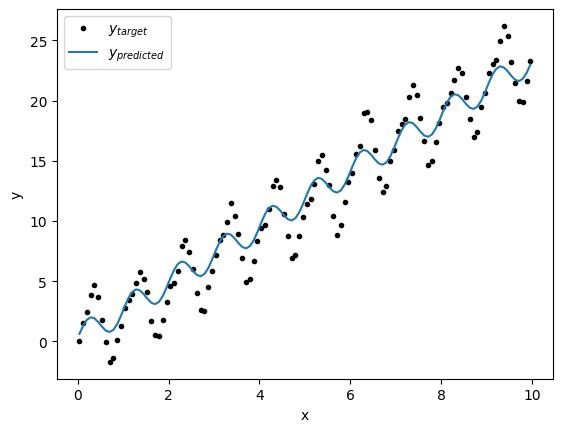

In [10]:
plt.plot(x,y,'k.',label='$y_{target}$')
plt.plot(x,y_predicted,label='$y_{predicted}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

Hmm, that's curious - the line doesn't seem to fit that well... Let's take alook a the loss function and see if we have converged:

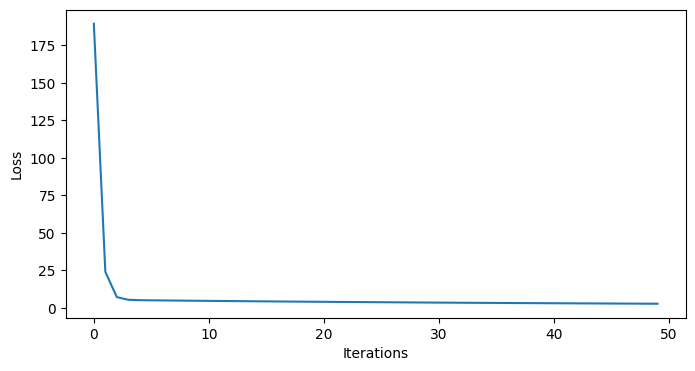

In [11]:
plt.figure(figsize=(8,4))
plt.plot(model.losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

Indeed, it does seem we have converged - so what's going on?

## Normalizing features

In the above example, we fit our model to the data by taking "steps" in the error space toward the local minimum - but not all steps are created equal. We can get a sense for this by printing some of the values in our design matrix:


In [12]:
# first few lines of X
print(X[:5, :])

# last few lines of X
print(X[-5:, :])

[[1.         0.0411     0.25537826]
 [1.         0.126      0.71153568]
 [1.         0.2027     0.95616176]
 [1.         0.2877     0.9720758 ]
 [1.         0.3699     0.7293986 ]]
[[ 1.          9.6219     -0.69320059]
 [ 1.          9.7068     -0.96338752]
 [ 1.          9.789      -0.9701266 ]
 [ 1.          9.874      -0.71153568]
 [ 1.          9.9562     -0.2717428 ]]


As we can see the range for the $x$ data is much larger than for the $\sin(2\pi x)$ data. When we fit our model, the steps for the slope are much bigger than the steps for the amplitude. In this case, this means that the error can be made small by getting the trend correct without minding too much about the amplitude of the seasonal cycle. 

This is a common problem in multiple linear regression. One way around this issue is to *standardize* the input feartures. To standardize a feature $x$, we remove its mean $\mu$ and divide by its standard deviation $\sigma$:

$$
z = \frac{x - \mu}{\sigma}
$$

Let's standardize the features and take a look at what our standardized data looks like:

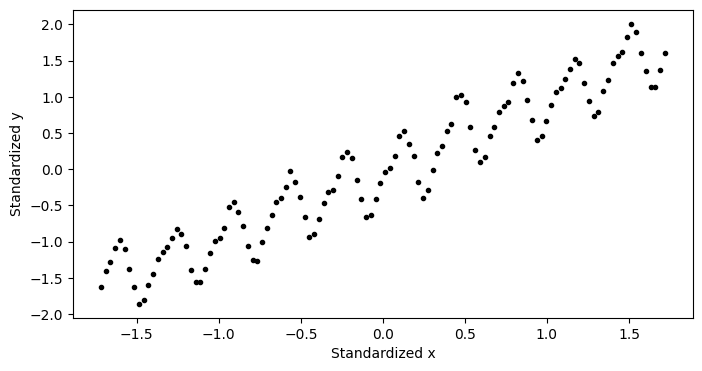

In [13]:
# standardize the features
x_standardized = (x-np.mean(x))/np.std(x)
sin_x_standardized = (np.sin(x*2*np.pi)-np.mean(np.sin(x*2*np.pi)))/np.std(np.sin(x*2*np.pi))
y_standardized = (y-np.mean(y))/np.std(y)

# plot the standardized data
plt.figure(figsize=(8,4))
plt.plot(x_standardized,y_standardized,'k.')
plt.xlabel('Standardized x')
plt.ylabel('Standardized y')
plt.show()


As we can see, the data now has zero mean and the magnitudes of both are equal. Let's fit a model to our standardized data. Since we have standardized our data, our model no longer has an intercept, so we may write our model as

$$
\hat{z} = \beta_1 \chi_1 + \beta_2 \chi_2
$$

where here, we are using $\hat{z}$ to represent the model fit to our standardized data, the $\beta$'s to represent the slopes, and the $\chi$'s to represent the standardized input features. Since we wrote our model to be generalizable, we just need to form the design matrix for this model and this use our code to fit it:

In [14]:
# create the design matrix with standardized features
X_standardized = np.column_stack([x_standardized, sin_x_standardized])

In [17]:
# fit the model to the standardized data
n_iterations = 500
model_standardized = LinearRegression(X_standardized, 0.01, n_iterations)
model_standardized.fit(X_standardized, y_standardized)

We can double check our model has converged by looking at the loss function:

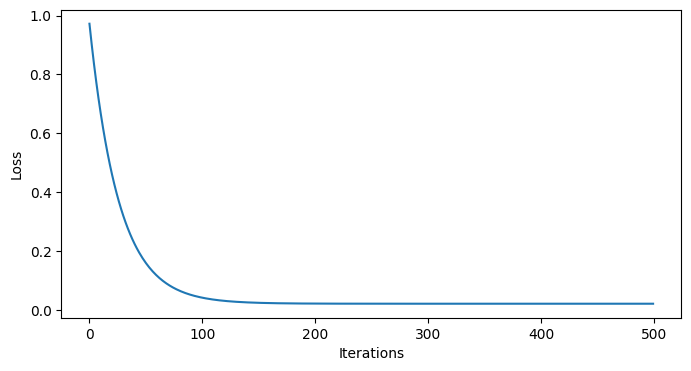

In [18]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(n_iterations), model_standardized.losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

and by plotting it:

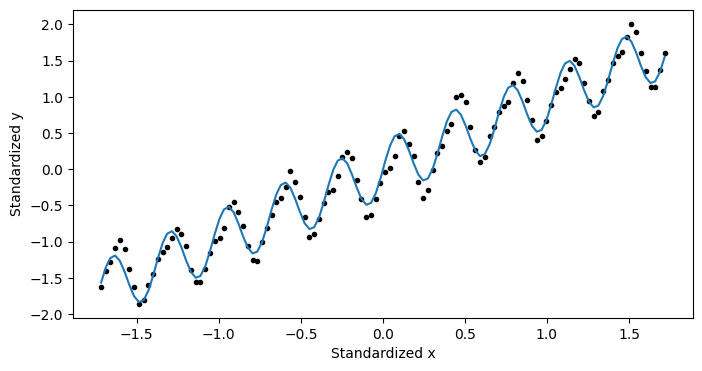

In [19]:
plt.figure(figsize=(8,4))
plt.plot(x_standardized,y_standardized,'k.')
plt.plot(x_standardized, model_standardized.forward(X_standardized), label='Predicted')
plt.xlabel('Standardized x')
plt.ylabel('Standardized y')
plt.show()

This looks pretty good! But... it doesn't exactly tell us what we wanted to know. We haven't actual got an answer to our question yet. We need to convert this information back to the unstandardized data.

If we fill in some of our definitions, we see  that

$$
\begin{align*}
\hat{z} &= \beta_1 \chi_1 + \beta_2 \chi_2\\
\Longrightarrow \frac{y-\mu_y}{\sigma_y} &= \beta_1 \left( \frac{x_1 - \mu_{x_1}}{\sigma_{x_1}}  \right) + \beta_2 \left( \frac{x_2 - \mu_{x_2}}{\sigma_{x_2}}  \right)
\end{align*}
$$

With a little rearranging, we see

$$
\begin{align*}
y &= \mu_y + \beta_1 \sigma_y \left( \frac{x_1 - \mu_{x_1}}{\sigma_{x_1}}  \right) + \beta_2 \sigma_y \left( \frac{x_2 - \mu_{x_2}}{\sigma_{x_2}}  \right) \\
&= \left( \mu_y - \frac{\beta_1 \sigma_y }{\sigma_{x_1}} - \frac{\beta_2 \sigma_y }{\sigma_{x_2}}\right) +  \left(\frac{\beta_1 \sigma_y}{\sigma_{x_1}}\right) x_1  + \left(\frac{\beta_2 \sigma_y}{\sigma_{x_2}}\right) x_2
\end{align*}
$$

By comparing the above line with our original model,

$$
y = b + w_1 x_1 + w_2 x_2
$$

we can see recover some formulas to convert the coefficients for our standardized data back to coefficients for our non-standardized data:

$$
\begin{align*}
b &= \mu_y - \frac{\beta_1 \sigma_y \mu_{x_1}}{\sigma_{x_1}} - \frac{\beta_2 \sigma_y \mu_{x_2}}{\sigma_{x_2}}\\
w_1 &= \frac{\beta_1 \sigma_y}{\sigma_{x_1}} \\
w_2 &= \frac{\beta_2 \sigma_y}{\sigma_{x_2}}
\end{align*}
$$

Let's compute these coefficients:

In [23]:
# get the standardized weights
Beta_1 = model_standardized.w[0]
Beta_2 = model_standardized.w[1]
print('Standardized Weight 1:', Beta_1)
print('Standardized Weight 2:', Beta_2)

# convert the standardized weights back to the original scale
w1 = Beta_1 * np.std(y) / np.std(x)
w2 = Beta_2 * np.std(y) / np.std(np.sin(2*x*np.pi))
b = np.mean(y) - w1*np.mean(x) - w2*np.mean(np.sin(2*x*np.pi))

print('Weight 1 (original scale):', w1)
print('Weight 2 (original scale):', w2) 
print('Bias (original scale):', b)

Standardized Weight 1: 0.9699590468076364
Standardized Weight 2: 0.28674208838694715
Weight 1 (original scale): 2.4247174466529615
Weight 2 (original scale): 2.9206897707473267
Bias (original scale): -0.4361555483924965


With the coefficients in hand, let's check out our model performance:

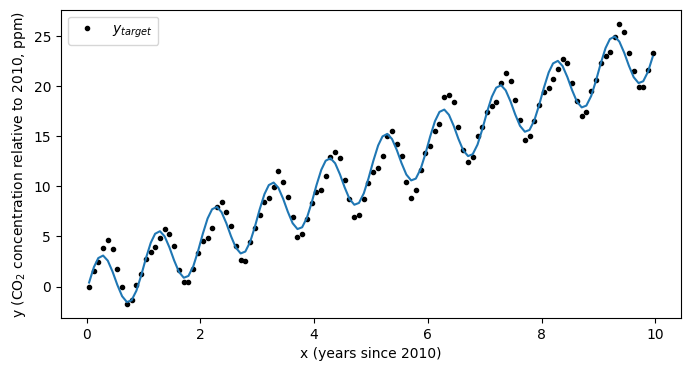

In [24]:
plt.figure(figsize=(8,4))
plt.plot(x,y,'k.',label='$y_{target}$')

# plot the predicted outputs with the new weights
plt.plot(x, b + w1*x + w2*np.sin(2*x*np.pi))

plt.xlabel('x (years since 2010)')
plt.ylabel('y (CO$_2$ concentration relative to 2010, ppm)')
plt.legend(loc=2)
plt.show()

Looks much better! Using this simple model we've now estimated not only the trend in the data, but also it's seasonal cycle:

In [25]:
print(f'Trend in carbon dioxide concentration: {w1:.2f} ppm per year')
print(f'Seasonal cycle amplitude: {w2:.2f} ppm')

Trend in carbon dioxide concentration: 2.42 ppm per year
Seasonal cycle amplitude: 2.92 ppm


## Other Applications

This framework is turns out to be quite flexible. Let see how this works by taking a look back at the full dataset - the one we subsetted in the past several notebooks:

In [26]:
# define x and y for the whole dataset
x = np.array(df.iloc[:,3])
y = np.array(df.iloc[:,4])

# remove the first values
x = x-x[0]
y = y-y[0]

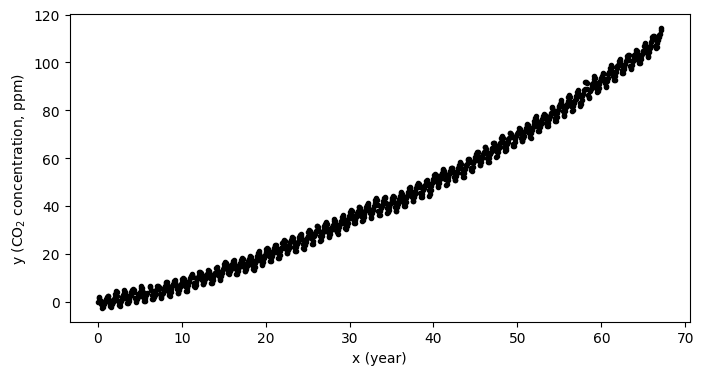

In [27]:
plt.figure(figsize=(8,4))
plt.plot(x,y,'k.')
plt.xlabel('x (year)')
plt.ylabel('y (CO$_2$ concentration, ppm)')
plt.show()

### CO$_2$ growth as a simple linear model

As we can see in the plot above, there is an "acceleration" term. That is, the CO$_2$ concentration is not increasing a constant rate, but the rate of increase is also growing as well. If we try to fit a model with only one input feature (in other words, a line) then the fit isn't going to be consistent with our data:

In [29]:
# make a design matrix for the simple linear regression case
X = np.column_stack([np.ones_like(x),x])

In [32]:
# fit a simple linear model to the standardized data
simple_model = LinearRegression(X, 0.0001, 500)
simple_model.fit(X, y)

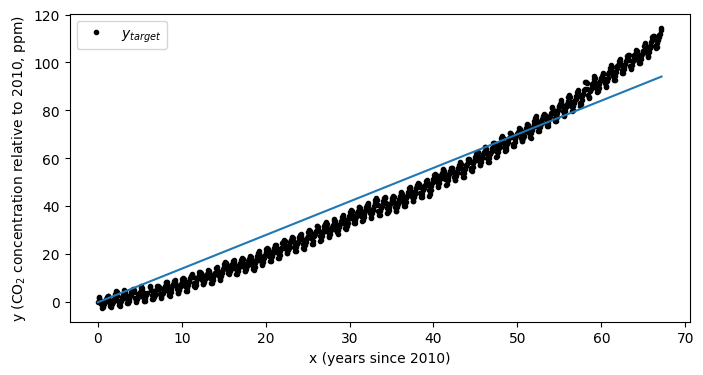

In [33]:
# plot the model on the data
plt.figure(figsize=(8,4))
plt.plot(x,y,'k.',label='$y_{target}$')

# plot the simple linear model
plt.plot(x, simple_model.forward(X))

plt.xlabel('x (years since 2010)')
plt.ylabel('y (CO$_2$ concentration relative to 2010, ppm)')
plt.legend(loc=2)
plt.show()

As we can see, our model doesn't match our data very well. Just to double check, we can ensure that the model has converged:

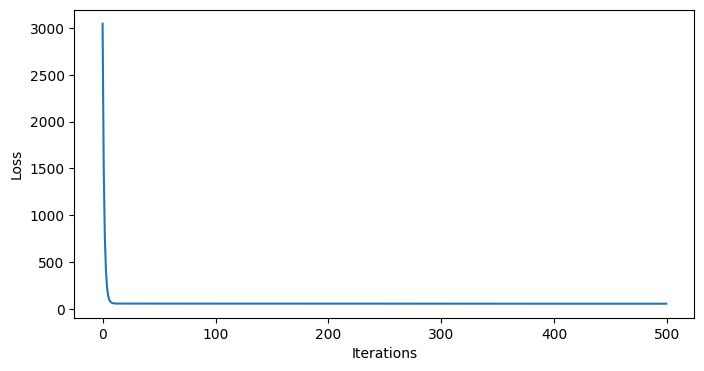

In [34]:
# plot the losses to ensure the model has converged
plt.figure(figsize=(8,4))
plt.plot(simple_model.losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

Indeed, it looks like the model has converged. How can we expand our model a bit to include the acceleration term?

### CO$\_2$ growth as a quadratic model

It turns out, we already have all of the tools we need to fit a quadratic model of the form 

$$
\hat{y} = b + w_1x + w_2x^2
$$

In this case, the $x^2$ term will function just like our $\sin$ term from above. First, we standardize our features:

In [35]:
# standardize the features
x_standardized = (x - np.mean(x)) / np.std(x)
x_squared_standardized = (x**2 - np.mean(x**2)) / np.std(x**2)
y_standardized = (y - np.mean(y)) / np.std(y)

X = np.column_stack([x_standardized, x_squared_standardized])

Then, we fit our model to the standardized data:

In [43]:
# fit the model to the standardized data
model_quad = LinearRegression(X, 0.0001, 20000)
model_quad.fit(X, y_standardized)

And we use our existing equations to recover our coefficients:

In [44]:
# get the standardized weights
w_1_standardized = model_quad.w[0]
w_2_standardized = model_quad.w[1]
print('Standardized Weight 1:', w_1_standardized)
print('Standardized Weight 2:', w_2_standardized)

# convert the standardized weights back to the original scale
w1 = w_1_standardized * np.std(y) / np.std(x)
w2 = w_2_standardized * np.std(y) / np.std(x**2)
b = np.mean(y) - w1 * np.mean(x) - w2 * np.mean(x**2)
print('Weight 1 (original scale):', w1)
print('Weight 2 (original scale):', w2) 
print('Bias (original scale):', b)

Standardized Weight 1: 0.5044561957383545
Standardized Weight 2: 0.5005768527005585
Weight 1 (original scale): 0.8430600785765135
Weight 2 (original scale): 0.01201351622612085
Bias (original scale): -2.198190829951294


Let's see how we did:

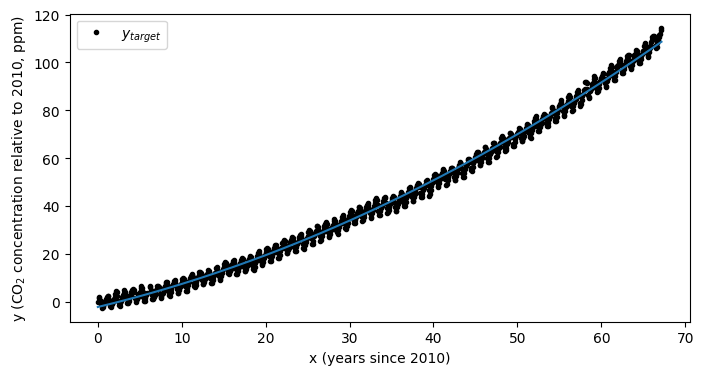

In [45]:
plt.figure(figsize=(8,4))
plt.plot(x,y,'k.',label='$y_{target}$')

# plot the model prediction of the data
plt.plot(x, b+ w1*x + w2*x**2)
plt.xlabel('x (years since 2010)')
plt.ylabel('y (CO$_2$ concentration relative to 2010, ppm)')
plt.legend(loc=2)
plt.show()

As always, we should peek at our losses to ensure we have converged:

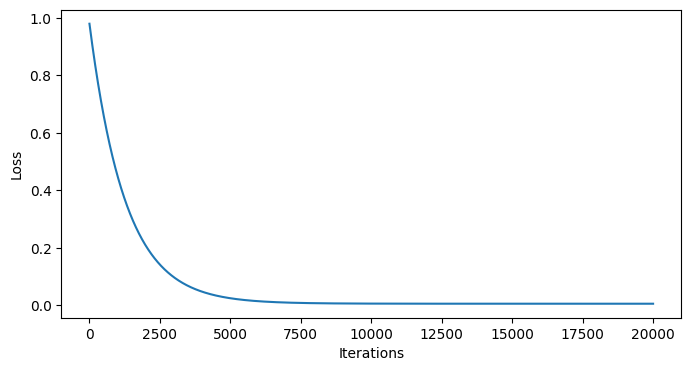

In [46]:
# plot the losses to ensure the model has converged
plt.figure(figsize=(8,4))
plt.plot(model_quad.losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

Looks like we converged!

**Key Takeaways**

1. The linear regression model we constructed in the previous notebook can be easily adapted to multiple regression problems.
2. Standardizing features is essential for improving model fit to data, even if the iterative model has converged.
3. After a model has been fit to standardized data, the coefficients of the model for the non-standardized data need to be recovered.